Demonstrate how PCA finds the major and minor axes of a 2D Gaussian PDF

In [9]:
import numpy as np
import math 
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)

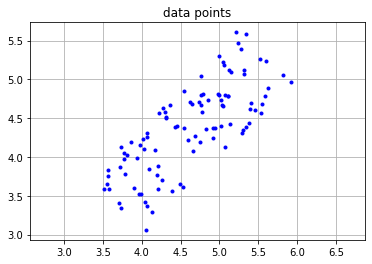

In [10]:
# a) Data generataion
N = 100 # of data points
mu = [4,3] # desired mean (center)
theta = 45*math.pi/180. # axis rotation angle in radians
R = [[math.cos(theta), math.sin(theta)],[-math.sin(theta),math.cos(theta)]]
vars = [8, 1]

# each row is a bivariate normal r.v. with 0 mean, unity covaariance
X = np.random.rand(N,2)
X = X@np.diag(np.sqrt(vars))@R + np.ones((N,1))*mu;
plt.plot(X[:,0],X[:,1],'b.')
plt.axis('equal')
plt.grid('on')
plt.title('data points')
plt.show()

sample mean vector =  [4.626 4.38 ]


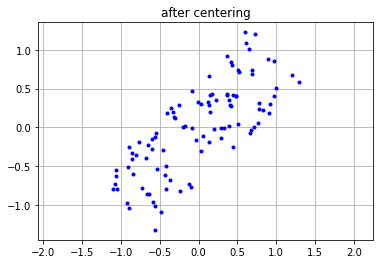

Singular values are: 
 [[7.856 0.   ]
 [0.    2.93 ]]
Principal Components in rows are: 
 [[-0.741 -0.671]
 [-0.671  0.741]]


In [11]:
# b) Perform PCA, use 1 components
n_component = 1
# A. Subtract sample mean (center the data)
xmean = np.mean(X,axis=0); # a 1 x 2 vector of sample mean
print('sample mean vector = ', xmean)
X0 = X - np.ones((N,2))*xmean; 
plt.plot(X0[:,0],X0[:,1],'b.')
plt.axis('equal')
plt.grid('on')
plt.title('after centering')
plt.show()
# B. SVD on the X0
U,S,Vh=np.linalg.svd(X0)

print('Singular values are: \n', np.diag(S))
print('Principal Components in rows are: \n', Vh)
# Note svd return vh, the principal components are rows of the Vh matrix. 
# since n_component = 1, we choose Vh[0,:] equi to V[:,1] a 2 x 1 column vector as the principal component.

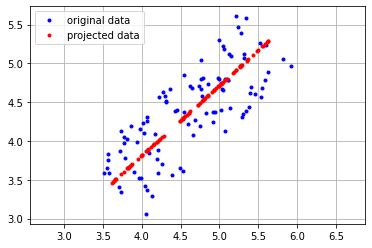

In [12]:
#d is the projection of (centered) data onto the principal component
d = X0@Vh[0]
# project data back to the original 2D space.# 
Xhat = Xhat = Vh[0]*d.reshape((100,1)) + np.ones((100,2))*xmean

plt.plot(X[:,0],X[:,1],'b.',label='original data')
plt.plot(Xhat[:,0],Xhat[:,1],'r.', label='projected data')
plt.axis('equal')
plt.grid('on')
plt.legend()
plt.show()